##  Deaths of People Experiencing Homelessness Visualisation Project
For this project I used the dataset [Deaths of People Experiencing Homelessness](https://open.toronto.ca/dataset/deaths-of-people-experiencing-homelessness/) from City of Toronto Open Data. 
Dataset is the one table, that has the following features: 
| Column	| Description |
| -------- | ------- |
| _id	| Unique row identifier for Open Data database |
| Year of death	| This represents the year that the death occurred. |
| Month of death	| This represents the month that the death occurred. |
| Count	| This represents the number of deaths in the specified category. Numbers have been aggregated to maintain privacy. |


For this project I prepared, analyzed and visualized data, trying to define what exactly causes the most death between people experiencing homelessness. 

In [1]:
#to import libraries 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#to read csv file and create a dataframe
df = pd.read_csv('Homeless deaths by cause.csv')
df

,_id,Year of death,Cause_of_death,Age_group,Gender,Count
0,1,2023,Cardiovascular Disease,Unknown,Male,1
1,2,2019,Other,20-39,Male,1
2,3,2018,Suicide,20-39,Male,1
3,4,2017,Accident,40-59,Male,2
4,5,2022,Other,40-59,Female,1
...,...,...,...,...,...,...
262,263,2017,Drug Toxicity,20-39,Female,3
263,264,2020,Drug toxicity,20-39,Male,21
264,265,2022,Unknown,40-59,Male,5
265,266,2019,Unknown,20-39,Male,3


In [3]:
#to clean data prior to visualising
df['Cause_of_death'] = df['Cause_of_death'].str.strip() #to delete all excessive spaces 
df['Cause_of_death'] = df['Cause_of_death'].str.replace('Drug toxicity','Drug Toxicity') #to replace duplicating values

In [4]:
#To create an aggregated dataframe for visualisation
death_reasons = df.groupby('Cause_of_death')['Count'].sum().reset_index() #to group by Cause of death and sum counts. 
death_reasons_sorted = death_reasons.sort_values(by='Count', ascending=False) #to sort dataframe descending by Count. 
death_reasons_sorted

,Cause_of_death,Count
4,Drug Toxicity,458
10,Unknown,225
3,Cardiovascular Disease,104
7,Other,50
2,Cancer,44
0,Accident,43
9,Suicide,30
8,Pneumonia,23
5,Homicide,21
6,Infection,10


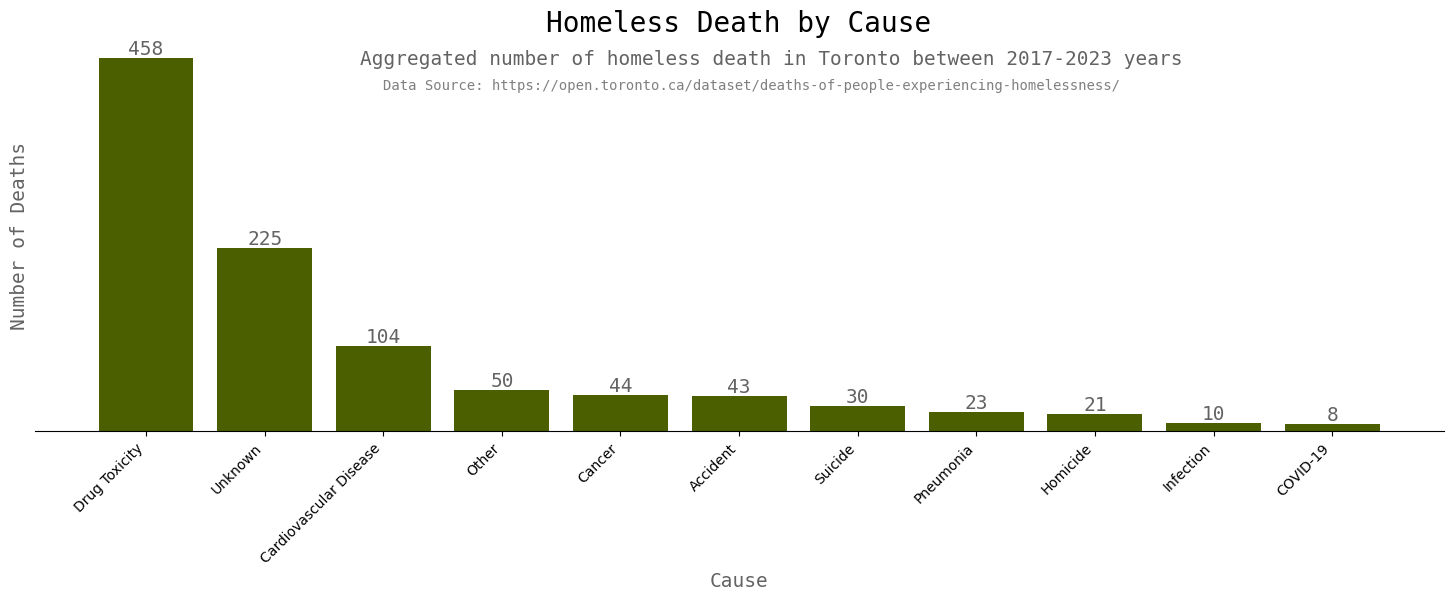

In [5]:
#To assign x and y for a visual
x1 = death_reasons_sorted['Cause_of_death']
y1 = death_reasons_sorted['Count']

#to create a figure
fig, ax = plt.subplots(figsize = (15, 5))

#to create font dictionaries
font1 = {'family':'monospace','color':'black','size':20}
font2 = {'family':'monospace','color':'#636363','size':14}
font3 = {'family':'monospace','color':'grey','size':10}

#to create bar graph visualisation
bars = ax.bar(x1, y1, 
       color = '#4b5f00')

#to set titles and x and y labels
ax.set_title('Homeless Death by Cause', fontdict=font1)
ax.set_ylabel('Number of Deaths', fontdict=font2)
ax.set_xlabel('Cause', fontdict=font2)

#to set tight layout for figure 
fig.tight_layout()

#to add subtitle to the visual
ax.text(x=1.8, y=450, s='Aggregated number of homeless death in Toronto between 2017-2023 years', fontdict=font2)

#to rotate x-labels to fit them without overlapping
plt.xticks(rotation=45, ha='right')

#to remove ticks and labels for y-axis
ax.yaxis.set_major_locator(plt.NullLocator())

#to add values at the top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, 
            yval, 
            int(yval), 
            ha='center', 
            va='bottom', 
            fontdict=font2)

#to add a link to data sourse
ax.text(x=2, y=420, 
        s = 'Data Source: https://open.toronto.ca/dataset/deaths-of-people-experiencing-homelessness/', 
        fontdict=font3)

#to remove frame around the visual
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)



## Summary
The following visualisation shows us that Drug toxicity is the most common cause of death between people experiencing homelessness. 458 death in period from 2017 to 2023 years. 